## Notebook to play with and compare Dataloaders and general data formats used for GNNs and Temporal GNNs

In [1]:
from matplotlib import pyplot as plt

## 1. Check raw datasets of different packages

### 1.1 Some PyG dataset

In [2]:
from torch_geometric.datasets import KarateClub

dataset_karate = KarateClub()
print(f"Number of nodes: {dataset_karate[0].num_nodes}")
print(f"Number of edges: {dataset_karate[0].num_edges}")
print(f"Number of node features: {dataset_karate[0].num_node_features}")
print(f"Number of classes: {dataset_karate.num_classes}")


Number of nodes: 34
Number of edges: 156
Number of node features: 34
Number of classes: 4


In [3]:
dataset_karate[0]

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

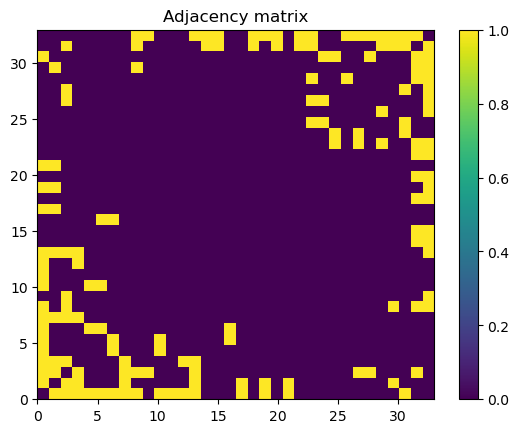

In [4]:
plt.hist2d(x=dataset_karate[0].edge_index[0].numpy(), y=dataset_karate[0].edge_index[1].numpy(), bins=dataset_karate[0].num_nodes)
plt.title("Adjacency matrix")
plt.colorbar()


In [5]:
'; '.join(list(filter(lambda x: not (x.startswith('__') or x.startswith('_')), list(dir(dataset_karate[0])))))


'apply; apply_; batch; clone; coalesce; contains_isolated_nodes; contains_self_loops; contiguous; coo; cpu; csc; csr; cuda; debug; detach; detach_; edge_attr; edge_attrs; edge_index; edge_stores; edge_subgraph; edge_weight; from_dict; generate_ids; get_all_edge_attrs; get_all_tensor_attrs; get_edge_index; get_tensor; get_tensor_size; has_isolated_nodes; has_self_loops; is_coalesced; is_cuda; is_directed; is_edge_attr; is_node_attr; is_sorted; is_undirected; keys; multi_get_tensor; node_attrs; node_offsets; node_stores; num_edge_features; num_edge_types; num_edges; num_faces; num_features; num_node_features; num_node_types; num_nodes; pin_memory; pos; put_edge_index; put_tensor; record_stream; remove_edge_index; remove_tensor; requires_grad_; share_memory_; size; sort; stores; stores_as; subgraph; to; to_dict; to_heterogeneous; to_namedtuple; update; update_tensor; validate; view; x; y'

### 1.2 MetroLA temporal graph dataset

In [6]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader
from torch_geometric_temporal.signal import StaticGraphTemporalSignal

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=12, num_timesteps_out=12)

In [7]:
attributes = list(filter(lambda x: (not x.startswith('__') and not x.startswith('_')), list(dir(dataset_metrola))))
attributes


['additional_feature_keys',
 'edge_index',
 'edge_weight',
 'features',
 'snapshot_count',
 'targets']

In [8]:
dataset_metrola.snapshot_count

34249

In [68]:
print(f'Edge index shape: {dataset_metrola.edge_index.shape}')
print(f'Edge weight shape: {dataset_metrola.edge_weight.shape}')
print(f'Features len: {len(dataset_metrola.features)}; Shape of each: {dataset_metrola.features[0].shape}')
print(f'Targets len: {len(dataset_metrola.targets)}; Shape of each: {dataset_metrola.targets[0].shape}')
print(f'{dataset_metrola.snapshot_count=}')

Edge index shape: (2, 1722)
Edge weight shape: (1722,)
Features len: 34249; Shape of each: (207, 2, 12)
Targets len: 34249; Shape of each: (207, 12)
dataset_metrola.snapshot_count=34249


## Custom dataloader dev

In [95]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')
from importlib import reload
from model import dataset
reload(dataset)
from model.dataset import create_dataloaders
from omegaconf import OmegaConf
from tqdm import tqdm
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader
from model.dataset import create_dataloaders

cfg = OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml'))
cfg.train.max_len = 10000

In [76]:
train_loader, val_loader, test_loader, topo_data = create_dataloaders(cfg)

sizes_rel=array([1, 0, 0]); sizes_abs=array([10000,     0,     0])


### Custom dataloader

In [188]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')
from importlib import reload
from model import dataset, transform
reload(dataset)
reload(transform)
from model.dataset import create_dataloaders
from omegaconf import OmegaConf

cfg = OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml'))
train_loader, val_loader, test_loader, topo_data = create_dataloaders(cfg, raw_data_dir='../data/METRLA')

a = train_loader.dataset[0]
a

(tensor([[ 0.5332,  0.4486,  0.5146,  ...,  0.4899,  0.5751,  0.4280],
         [ 0.6940,  0.7400,  0.5022,  ...,  0.3909,  0.4981,  0.7002],
         [ 0.6692,  0.5861,  0.3167,  ...,  0.4404,  0.5696,  0.6569],
         ...,
         [ 0.2796,  0.1133,  0.3847,  ..., -0.1410,  0.3442,  0.1683],
         [ 0.7620,  0.7345,  0.8044,  ...,  0.6259,  0.6741,  0.6383],
         [ 0.4095,  0.4590,  0.4157,  ...,  0.4280,  0.3167,  0.2884]]),
 tensor([[ 0.3724,  0.2452,  0.4961,  ...,  0.3909,  0.4761,  0.5641],
         [ 0.6631,  0.4486,  0.6631,  ...,  0.4157,  0.5201,  0.4651],
         [ 0.2425,  0.6026,  0.0693,  ...,  0.4218,  0.5311,  0.7620],
         ...,
         [-0.0235, -0.0517,  0.0322,  ...,  0.3352,  0.4267,  0.4157],
         [ 0.8115,  0.6246,  0.6754,  ...,  0.8115,  0.6796,  0.5208],
         [ 0.4899,  0.4321,  0.2363,  ...,  0.2301,  0.4651,  0.3538]]))

In [191]:
topo_data.edge_index.shape

torch.Size([2, 1722])

Text(0.5, 1.0, 'Histogram of number of nodes in each patch')

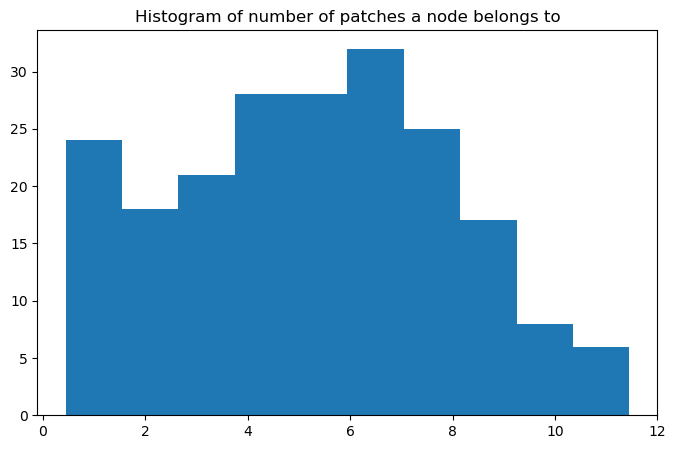

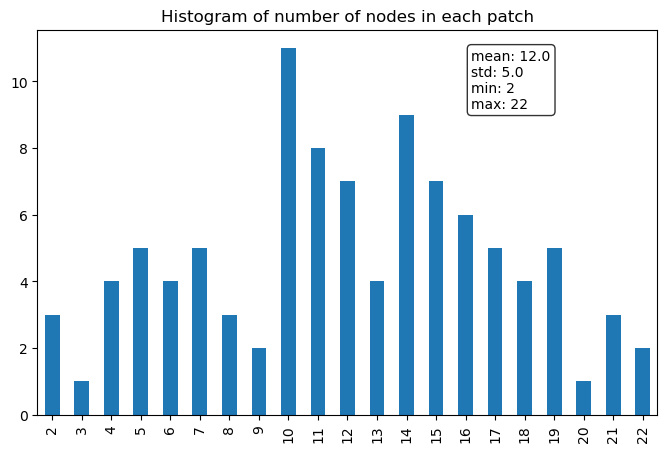

In [120]:
from matplotlib import pyplot as plt
import pandas as pd

subgraph_count = topo_data.subgraphs_batch.max()
patch_node_map = [topo_data.subgraphs_nodes_mapper[topo_data.subgraphs_batch == i] for i in range(subgraph_count)]

plt.figure(figsize=(8, 5))
pd.Series(topo_data.subgraphs_nodes_mapper).value_counts().hist(grid=False, align='left')
plt.title("Histogram of number of patches a node belongs to")

plt.figure(figsize=(8, 5))
pd.Series([len(p) for p in patch_node_map]).value_counts().sort_index().plot(kind='bar')
# Get statistics
node_counts = pd.Series([len(p) for p in patch_node_map])
stats = node_counts.describe()

# Add stats text to plot
stats_text = f"mean: {stats['mean']:.1f}\nstd: {stats['std']:.1f}\nmin: {stats['min']:.0f}\nmax: {stats['max']:.0f}"
plt.text(0.7, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Histogram of number of nodes in each patch")

In [ ]:
"""
Going node-by-node or patch-by-patch doesn't matter, use leading dimension vectorization. 
Using patch-by-patch for now.

For patch, create list of nodes: patch_node_map
"""

In [100]:
import torch
topo_data = torch.cat([train_loader.dataset[i].features for i in range(100)], dim=0).flatten()

count    248400.000000
mean          0.153355
std           0.722515
min          -2.652154
25%           0.087845
50%           0.390915
75%           0.582653
max           0.811501
dtype: float64


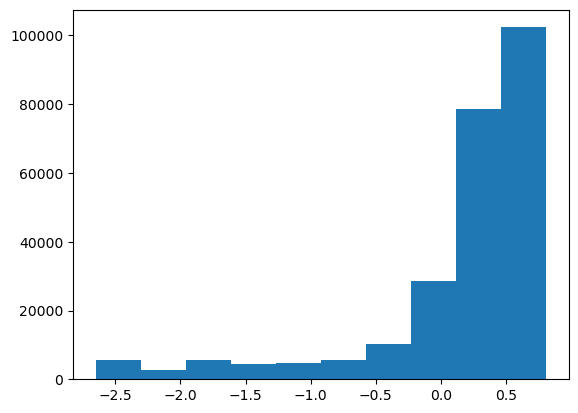

In [102]:
print(pd.Series(topo_data.flatten()).describe())
plt.hist(topo_data.flatten())
plt.show()

#### Raw dataset (before processing and creating dataloaders)

In [90]:
from model.dataset import create_train_val_test_split
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader

loader = METRLADatasetLoader()
dataset_metrola = loader.get_dataset(num_timesteps_in=12, num_timesteps_out=12)
train_data, val_data, test_data = create_train_val_test_split(dataset_metrola, max_len=100)

(array([424., 259., 162., 145., 113.,  92.,  86.,  58.,  74., 309.]),
 array([0.10008398, 0.19007558, 0.28006718, 0.37005877, 0.46005037,
        0.55004197, 0.6400336 , 0.73002517, 0.8200168 , 0.91000837,
        1.        ]),
 <BarContainer object of 10 artists>)

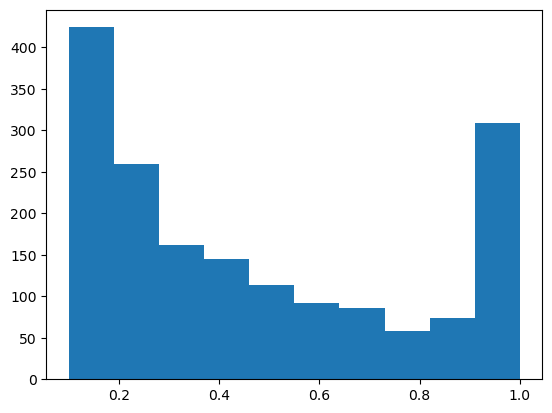

In [127]:
plt.hist(train_data[0].edge_attr.flatten())


## Original implementation

In [1]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/GMM/')


from model.dataset import create_dataset
from omegaconf import OmegaConf
from torch_geometric.loader import DataLoader


cfg = OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/GMM/model/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/GMM/train/zinc.yaml'))
train_dataset, val_dataset, test_dataset = create_dataset(cfg)
train_loader = DataLoader(train_dataset, cfg.train.batch_size, shuffle=True, num_workers=cfg.num_workers)


/Users/luis/opt/anaconda3/envs/ml-gnn/lib/python3.10/site-packages/torch_geometric/data/dataset.py:214: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete 'dataset/ZINC/subset/processed' first
  warnings.warn(


In [2]:
topo_data = next(iter(train_loader))
topo_data.keys()


['edge_index',
 'y',
 'patch_pe',
 'subgraphs_nodes_mapper',
 'subgraphs_edges_mapper',
 'combined_subgraphs',
 'batch',
 'ptr',
 'x',
 'edge_attr',
 'subgraphs_batch',
 'mask']

### Misc plots

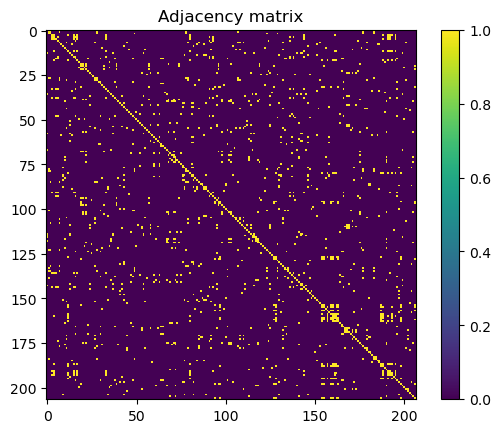

In [118]:
num_nodes = dataset_metrola.edge_index.max() + 1

adj_matrix = np.zeros((num_nodes, num_nodes))
adj_matrix[dataset_metrola.edge_index[0], dataset_metrola.edge_index[1]] = 1
plt.imshow(adj_matrix, interpolation='none')
plt.title("Adjacency matrix")
plt.colorbar()

Text(0.5, 1.0, 'MetroLA Graph Structure')

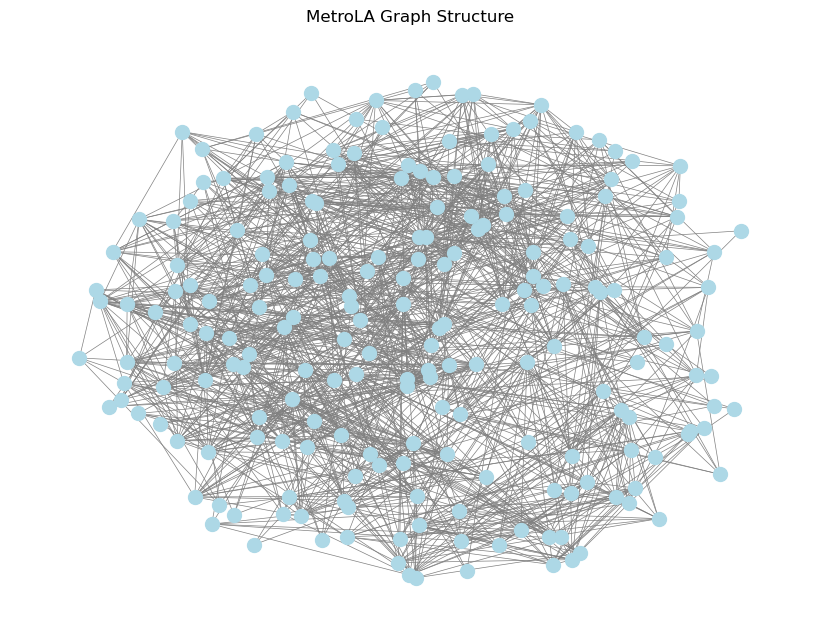

In [122]:
import networkx as nx

# Create networkx graph from adjacency matrix
adj_matrix_no_self_loops = adj_matrix.copy()
adj_matrix_no_self_loops[np.diag_indices_from(adj_matrix_no_self_loops)] = 0
G = nx.from_numpy_array(adj_matrix_no_self_loops, create_using=nx.Graph())

# Set up plot
plt.figure(figsize=(8,6))

# Draw the graph
pos = nx.spring_layout(G, k=1, iterations=50)
nx.draw(G, pos, 
        node_color='lightblue',
        node_size=100,
        width=0.5,
        edge_color='gray',
        with_labels=False)

plt.title("MetroLA Graph Structure")


### 1.3 Dataset used by GMM paper

In [83]:
from torch_geometric.datasets import ZINC

dataset_zinc = ZINC(root='../data/ZINC', subset=True, split='train')


Extracting data/ZINC/molecules.zip
Processing...
Processing test dataset: 100%|██████████| 1000/1000 [00:00<00:00, 13185.16it/s]
Done!


In [94]:
dataset_zinc[0].edge_attr


tensor([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2])

In [88]:
print('\n'.join(list(filter(lambda x: (not x.startswith('__') and not x.startswith('_')), list(dir(dataset_zinc[0]))))))

apply
apply_
batch
clone
coalesce
contains_isolated_nodes
contains_self_loops
contiguous
coo
cpu
csc
csr
cuda
debug
detach
detach_
edge_attr
edge_attrs
edge_index
edge_stores
edge_subgraph
edge_weight
from_dict
generate_ids
get_all_edge_attrs
get_all_tensor_attrs
get_edge_index
get_tensor
get_tensor_size
has_isolated_nodes
has_self_loops
is_coalesced
is_cuda
is_directed
is_edge_attr
is_node_attr
is_sorted
is_undirected
keys
multi_get_tensor
node_attrs
node_offsets
node_stores
num_edge_features
num_edge_types
num_edges
num_faces
num_features
num_node_features
num_node_types
num_nodes
pin_memory
pos
put_edge_index
put_tensor
record_stream
remove_edge_index
remove_tensor
requires_grad_
share_memory_
size
sort
stores
stores_as
subgraph
to
to_dict
to_heterogeneous
to_namedtuple
update
update_tensor
validate
view
x
y


In [7]:
print(f"Number of nodes: {dataset_zinc[0].num_nodes}")
print(f"Number of edges: {dataset_zinc[0].num_edges}")
print(f"Number of node features: {dataset_zinc[0].num_node_features}")
print(f"Number of classes: {dataset_zinc.num_classes}")

Number of nodes: 29
Number of edges: 64
Number of node features: 1
Number of classes: 9994


In [8]:
'; '.join(list(filter(lambda x: (not x.startswith('__') and not x.startswith('_')), list(dir(dataset_zinc[0])))))


'apply; apply_; batch; clone; coalesce; contains_isolated_nodes; contains_self_loops; contiguous; coo; cpu; csc; csr; cuda; debug; detach; detach_; edge_attr; edge_attrs; edge_index; edge_stores; edge_subgraph; edge_weight; from_dict; generate_ids; get_all_edge_attrs; get_all_tensor_attrs; get_edge_index; get_tensor; get_tensor_size; has_isolated_nodes; has_self_loops; is_coalesced; is_cuda; is_directed; is_edge_attr; is_node_attr; is_sorted; is_undirected; keys; multi_get_tensor; node_attrs; node_offsets; node_stores; num_edge_features; num_edge_types; num_edges; num_faces; num_features; num_node_features; num_node_types; num_nodes; pin_memory; pos; put_edge_index; put_tensor; record_stream; remove_edge_index; remove_tensor; requires_grad_; share_memory_; size; sort; stores; stores_as; subgraph; to; to_dict; to_heterogeneous; to_namedtuple; update; update_tensor; validate; view; x; y'

In [9]:
data = dataset_zinc[0]
d = {k: v for k, v in data}
for k, v in d.items():
    print(f"{k}: {v}")


x: tensor([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [2],
        [0],
        [0],
        [2],
        [5],
        [1],
        [1],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])
edge_index: tensor([[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,
          8,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15,
         16, 16, 16, 16, 17, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 23, 23, 24,
         24, 25, 25, 26, 26, 27, 27, 27, 28, 28],
        [ 1,  0,  2,  1,  3, 28,  2,  4,  3,  5,  4,  6, 27,  5,  7,  6,  8,  7,
          9, 10,  8,  8, 11, 27, 10, 12, 11, 13, 26, 12, 14, 13, 15, 14, 16, 25,
         15, 17, 18, 19, 16, 16, 16, 20, 24, 19, 21, 20, 22, 23, 21, 21, 24, 19,
         23, 15, 26, 12, 25,  5, 10, 28,  2, 27]])
edge_attr: tensor([1

In [10]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')

from model.transform import GraphPartitionTransform, PositionalEncodingTransform
from omegaconf import OmegaConf

cfg = OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/model/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/zinc.yaml'))
    
pre_transform = PositionalEncodingTransform(rw_dim=cfg.pos_enc.rw_dim, lap_dim=cfg.pos_enc.lap_dim)

transform_train = GraphPartitionTransform(n_patches=cfg.metis.n_patches,
                                            metis=cfg.metis.enable,
                                            drop_rate=cfg.metis.drop_rate,
                                            num_hops=cfg.metis.num_hops,
                                            is_directed=False,
                                            patch_rw_dim=cfg.pos_enc.patch_rw_dim,
                                            patch_num_diff=cfg.pos_enc.patch_num_diff)

In [47]:
train_dataset = ZINC(root='dataset/ZINC', subset=True, split='train', pre_transform=pre_transform, transform=transform_train)
data = train_dataset[0]

In [50]:
data.x.squeeze()

tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 5, 1, 1, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0])

In [64]:
cfg

{'dataset': 'ZINC', 'num_workers': 8, 'device': 'cpu', 'seed': None, 'logfile': None, 'depth': -1, 'train': {'batch_size': 128, 'epochs': 2000, 'runs': 4, 'lr': 0.001, 'lr_patience': 100, 'lr_decay': 0.5, 'wd': 0.0, 'dropout': 0.0, 'mlpmixer_dropout': 0.0, 'min_lr': 1e-05, 'optimizer': 'Adam'}, 'model': {'gnn_type': 'GINEConv', 'gMHA_type': 'MLPMixer', 'hidden_size': 128, 'nlayer_gnn': 4, 'nlayer_mlpmixer': 4, 'pool': 'mean', 'residual': True}, 'pos_enc': {'rw_dim': 20, 'lap_dim': 0, 'patch_rw_dim': 8, 'patch_num_diff': -1}, 'metis': {'enable': True, 'online': True, 'n_patches': 32, 'drop_rate': 0.3, 'num_hops': 1}}

## 2. Check HDTTS datasets

Datasets used in the paper:
- AQI
- EngRAD
- Pv-US
- GraphMSO


In [3]:
from omegaconf import OmegaConf
from hdtts_dataset_creation import GraphMSO, EngRad, PvUS

cfg_dict = {'workers': 0, 'num_threads': 1, 'mask_as_exog': False, 'epochs': 100, 'patience': 20, 'batch_size': 64, 'train_batches': 300, 'grad_clip_val': 5, 'scaler': {'method': 'Standard', 'axis': 'graph', 'scale_target': False}, 'optimizer': {'name': 'AdamW', 'hparams': {'lr': 0.005, 'weight_decay': 0.01}}, 'whiten_prob': None, 'imputation_loss': False, 'imputation_loss_weight': 1.0, 'imputation_warm_up': 6, 'dataset': {'name': 'mso_point', 'splitting': {'val_len': 0.1, 'test_len': 0.2}, 'connectivity': {'include_self': False, 'layout': 'csr'}, 'hparams': {'n_nodes': 100, 'n_steps': 10000, 'spatial_order': 3, 'graph_generator': 'knn3', 'noise': 0.0, 'propagate_mask': False, 'cached': True, 'root': './data/${dataset.name}', 'p_fault': 0, 'p_noise': 0.05, 'min_seq': 8, 'max_seq': 48, 'seed': 123, 'max_neighbors': 5}}, 'window': 72, 'horizon': 36, 'stride': 1, 'model': {'name': 'hd_tts_imp', 'hparams': {'hidden_size': 64, 'dilation': 4, 'rnn_layers': 3, 'cell': 'gru', 'mp_method': ['diffconv', 'diffconv'], 'mp_kernel_size': 1, 'pooling_layers': 3, 'mp_stage': 'both', 'recursive_lifting': True, 'fully_connected_readout': False, 'multi_step_scores': False, 'dropout': 0, 'activation': 'elu'}}, 'lr_scheduler': {'name': 'MultiStepLR', 'hparams': {'gamma': 0.3, 'milestones': [40, 60, 80]}}, 'run': {'seed': 58523897, 'dir': '/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/hdtts/logs/hd_tts_imp/mso_point/2024-12-17/14-47-49', 'name': '${now:%Y-%m-%d_%H-%M-%S}_${run.seed}'}}

cfg = OmegaConf.create(cfg_dict)

In [4]:
dataset = EngRad(root='../data/EngRAD')
# dataset = GraphMSO(root='../data/GraphMSO')
# dataset = PvUS(root='../data/PvUS')
# dataset = AQI(root='../data/AQI')
dataset

EngRad(length=26304, n_nodes=487, n_channels=5)

In [9]:
dataset.dataframe()

nodes                     abingdon_oxfordshire                       \
channels                        temperature_2m relative_humidity_2m   
2018-01-01 00:00:00+00:00                  6.1                 0.79   
2018-01-01 01:00:00+00:00                  5.6                 0.81   
2018-01-01 02:00:00+00:00                  5.4                 0.78   
2018-01-01 03:00:00+00:00                  5.4                 0.78   
2018-01-01 04:00:00+00:00                  5.6                 0.79   
...                                        ...                  ...   
2020-12-31 19:00:00+00:00                 -1.0                 0.96   
2020-12-31 20:00:00+00:00                 -1.9                 0.97   
2020-12-31 21:00:00+00:00                 -2.3                 0.98   
2020-12-31 22:00:00+00:00                 -2.1                 0.97   
2020-12-31 23:00:00+00:00                 -2.3                 0.97   

nodes                                                                    \
channels                  precipitation cloud_cover shortwave_radiation   
2018-01-01 00:00:00+00:00           0.0        0.23                 0.0   
2018-01-01 01:00:00+00:00           0.0        0.03                 0.0   
2018-01-01 02:00:00+00:00           0.0        0.55                 0.0   
2018-01-01 03:00:00+00:00           0.0        0.61                 0.0   
2018-01-01 04:00:00+00:00           0.0        0.15                 0.0   
...                                 ...         ...                 ...   
2020-12-31 19:00:00+00:00           0.0        0.37                 0.0   
2020-12-31 20:00:00+00:00           0.0        0.22                 0.0   
2020-12-31 21:00:00+00:00           0.0        0.36                 0.0   
2020-12-31 22:00:00+00:00           0.0        0.47                 0.0   
2020-12-31 23:00:00+00:00           0.0        0.38                 0.0   

nodes                     aldridge_west_midlands                       \
channels                          temperature_2m relative_humidity_2m   
2018-01-01 00:00:00+00:00                    4.2                 0.83   
2018-01-01 01:00:00+00:00                    3.7                 0.83   
2018-01-01 02:00:00+00:00                    3.5                 0.82   
2018-01-01 03:00:00+00:00                    3.6                 0.83   
2018-01-01 04:00:00+00:00                    3.8                 0.82   
...                                          ...                  ...   
2020-12-31 19:00:00+00:00                   -1.8                 0.96   
2020-12-31 20:00:00+00:00                   -1.5                 0.95   
2020-12-31 21:00:00+00:00                   -1.1                 0.94   
2020-12-31 22:00:00+00:00                   -0.8                 0.94   
2020-12-31 23:00:00+00:00                   -0.7                 0.94   

nodes                                                                    ...  \
channels                  precipitation cloud_cover shortwave_radiation  ...   
2018-01-01 00:00:00+00:00           0.0        0.37                 0.0  ...   
2018-01-01 01:00:00+00:00           0.0        0.45                 0.0  ...   
2018-01-01 02:00:00+00:00           0.0        0.34                 0.0  ...   
2018-01-01 03:00:00+00:00           0.0        0.28                 0.0  ...   
2018-01-01 04:00:00+00:00           0.0        0.55                 0.0  ...   
...                                 ...         ...                 ...  ...   
2020-12-31 19:00:00+00:00           0.0        0.60                 0.0  ...   
2020-12-31 20:00:00+00:00           0.0        0.76                 0.0  ...   
2020-12-31 21:00:00+00:00           0.0        0.79                 0.0  ...   
2020-12-31 22:00:00+00:00           0.0        0.79                 0.0  ...   
2020-12-31 23:00:00+00:00           0.0        1.00                 0.0  ...   

nodes                     yate_gloucestershire                       \
channels                        temper

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
dataset.n_nodes
adj = dataset.get_connectivity()
edge_index = adj[0]
edge_weight = adj[1]

In [28]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/')
from importlib import reload
from omegaconf import OmegaConf
from model import dataset
reload(dataset)
from model.dataset import create_dataloaders
cfg = OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/config.yaml')
cfg = OmegaConf.merge(cfg, OmegaConf.load('/Users/luis/Desktop/ETH/Courses/AS24-DL/Project/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml'))
cfg.dataset.name = 'METRLA'
# cfg.dataset.max_len = 100
# cfg.train.batch_size = 2
# cfg.dataset.train_size = 0.8
# cfg.dataset.val_size = 0.1
train_loader, val_loader, test_loader, topo_data = create_dataloaders(cfg)



Dataloaders and Topology Data Overview:
Batch size: 1
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 1            | 1           

Topology Data:
Number of nodes: 207
Number of edges: 1722
----------------------------------------------------------


In [29]:
train_loader.dataset.dataset.dataset

DynamicNodeDataset(x=torch.Size([34165, 207, 72]), y=torch.Size([34165, 207, 36]))

In [25]:
train_loader.dataset.dataset.dataset

DynamicNodeDataset(x=torch.Size([1, 100, 72]), y=torch.Size([1, 100, 36]))

In [20]:
topo_data.edge_weight

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [1]:
# GraphMSO

def create_sliding_window_dataset(data, window, delay, horizon, stride, max_steps=None, max_allowed_mem=8):
    assert data.ndim == 2  # (n_timesteps, n_nodes)
    steps = data.shape[0] - window - delay - horizon
    if max_steps is not None:
        steps = min(steps, max_steps)
    # Calc memory needed
    memory_needed = window * steps * 8 *1e-9  # GB
    print(f"Memory needed: {memory_needed:.2f} GB")
    assert memory_needed <= max_allowed_mem, f"Memory needed ({memory_needed:.2f} GB) exceeds max allowed memory ({max_allowed_mem} GB)"

    x_idx = np.arange(window)[np.newaxis, :] + np.arange(steps, step=stride)[:, np.newaxis]  # (batch_size, window)
    y_idx = np.arange(window+delay+1, window+delay+horizon+1)[np.newaxis, :] + np.arange(steps, step=stride)[:, np.newaxis]  # (batch_size, horizon)
    assert x_idx.shape[0] == y_idx.shape[0]

    x, y = data[x_idx], data[y_idx]
    return x, y


def get_data_MSO(window, delay, horizon, stride, root='../data/GraphMSO'):
    dataset = GraphMSO(root=root)

    x, y = create_sliding_window_dataset(dataset.target.squeeze(), window, delay, horizon, stride, max_steps=cfg.dataset.max_len)

    adj = dataset.get_connectivity({'include_self': False, 'layout': 'edge_index'})
    edge_index = adj[0]
    edge_weight = adj[1]
    n_nodes = dataset.target.shape[1]

    return x, y, edge_index, edge_weight, n_nodes

def get_data_PvUS(window, delay, horizon, stride, root='../data/PvUS'):
    dataset = PvUS(root=root)

    x, y = create_sliding_window_dataset(dataset.target.to_numpy(), window, delay, horizon, stride, max_steps=cfg.dataset.max_len)

    n_nodes = dataset.n_nodes
    adj = dataset.get_connectivity()  # No params needed
    edge_index = adj[0]
    edge_weight = adj[1]

    return x, y, edge_index, edge_weight, n_nodes

def get_data_EngRAD(window, delay, horizon, stride, root='../data/EngRAD'):
    dataset = EngRad(root=root)

    channel = cfg.dataset.EngRADchannel
    assert channel < 5 and channel >= 0, "Channel must be between 0 and 4"

    x, y = create_sliding_window_dataset(dataset.target.to_numpy()[:, channel::5], window, delay, horizon, stride, max_steps=cfg.dataset.max_len)

    n_nodes = dataset.n_nodes
    adj = dataset.get_connectivity()  # No params needed
    edge_index = adj[0]
    edge_weight = adj[1]

    return x, y, edge_index, edge_weight, n_nodes

In [8]:
dataset = PvUS(root='../data/PvUS')


In [9]:
dataset.n_nodes


5016

In [221]:
print('\n'.join(list(filter(lambda x: not (x.startswith('__') or x.startswith('_')), list(dir(dataset))))))

add_covariate
add_exogenous
aggregate
aggregate_
attributes
available_zones
build
channels
clean_downloads
clean_root_dir
compute_similarity
convert_to_timezone
copy
covariates
dataframe
datetime_encoded
datetime_idx
datetime_onehot
default_splitting_method
detrend
download
exogenous
expand_frame
fill_nan_
force_synchronization
freq
get_config
get_connectivity
get_frame
get_mask
get_similarity
get_splitter
has_covariates
has_mask
holidays_onehot
index
is_target_dataframe
length
load
load_pickle
load_raw
mask
mask_zeros
maybe_build
maybe_download
n_channels
n_covariates
n_nodes
name
nodes
numpy
patterns
precision
raw_file_names
raw_files_paths
raw_files_paths_list
reduce
reduce_
required_file_names
required_files_paths
required_files_paths_list
resample
resample_
root
root_dir
save_pickle
set_mask
set_target
shape
similarity_options
similarity_score
sort
spatial_aggregation
synchronize
target
temporal_aggregation
tz_mapper
urls
zones
